# Calculate morphology features for segmented cells in an image

This example shows how to use `squidpy.im.quantify_morphology` to calculate morphology features
like area and granularity for segmented cells in an image.

As input, `quantify_morphology` requires an `SpatialData` object with both intensity images and labels
of the segmented cells. 
The results of `quantify_morphology` are then written to the dataframe `obsm["morphology"]` of the relevant
`anndata` table in the `sdata` object  

In [1]:
import squidpy as sq
import spatialdata_plot
from spatialdata.datasets import blobs

In [2]:
sdata_blobs = blobs()

/home/npeschke/miniconda3/envs/mamba/envs/squidpy-dev/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/npeschke/miniconda3/envs/mamba/envs/squidpy-dev/lib/python3.10/site-packages/spatialdata/models/models.py:996: UserWarning: Converting `region_key: region` to categorical dtype.
  return convert_region_column_to_categorical(adata)


In [3]:
sdata_blobs

SpatialData object
├── Images
│     ├── 'blobs_image': DataArray[cyx] (3, 512, 512)
│     └── 'blobs_multiscale_image': DataTree[cyx] (3, 512, 512), (3, 256, 256), (3, 128, 128)
├── Labels
│     ├── 'blobs_labels': DataArray[yx] (512, 512)
│     └── 'blobs_multiscale_labels': DataTree[yx] (512, 512), (256, 256), (128, 128)
├── Points
│     └── 'blobs_points': DataFrame with shape: (<Delayed>, 4) (2D points)
├── Shapes
│     ├── 'blobs_circles': GeoDataFrame shape: (5, 2) (2D shapes)
│     ├── 'blobs_multipolygons': GeoDataFrame shape: (2, 1) (2D shapes)
│     └── 'blobs_polygons': GeoDataFrame shape: (5, 1) (2D shapes)
└── Tables
      └── 'table': AnnData (26, 3)
with coordinate systems:
    ▸ 'global', with elements:
        blobs_image (Images), blobs_multiscale_image (Images), blobs_labels (Labels), blobs_multiscale_labels (Labels), blobs_points (Points), blobs_circles (Shapes), blobs_multipolygons (Shapes), blobs_polygons (Shapes)

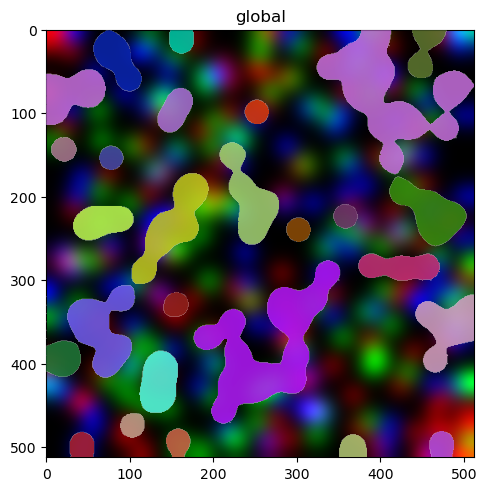

In [4]:
sdata_blobs.pl.render_images().pl.render_labels().pl.show()

In [5]:
sq.im.quantify_morphology(
    sdata=sdata_blobs,
    label="blobs_labels",
    image="blobs_image",
)

area  area_bbox  area_convex  area_filled  \
region       instance_id                                                 
blobs_labels 1            15057.0    89088.0      60402.0      15057.0   
             2            12424.0    34125.0      19969.0      12424.0   
             3             4968.0    12144.0       6152.0       4968.0   
             4             4889.0     8910.0       6338.0       4889.0   
             5             4028.0     8662.0       5184.0       4028.0   
             6             3832.0     7636.0       4300.0       3832.0   
             8             3745.0    47616.0      37045.0       3745.0   
             9             2745.0     3404.0       2807.0       2745.0   
             10            2495.0     3104.0       2835.0       2495.0   
             11            2409.0     4292.0       2613.0       2409.0   
             12            2267.0     2952.0       2340.0       2267.0   
             13            1556.0     2714.0       2040.0       1556.0   
             15            1529.0     1806.0       1561.0       1529.0   
             16            1518.0     2226.0       1552.0       1518.0   
             17             778.0    14848.0      10394.0        778.0   
             18             767.0    14848.0       7882.0        767.0   
             19             766.0    14848.0      10398.0        766.0   
             20             763.0      870.0        780.0        763.0   
             22             756.0    16896.0      13884.0        756.0   
             23             695.0      870.0        716.0        695.0   
             24             677.0      870.0        697.0        677.0   
             25             672.0      841.0        694.0        672.0   
             26             653.0      841.0        672.0        653.0   
             27             648.0      841.0        671.0        648.0   
             29             643.0      841.0        665.0        643.0   
             30             636.0      841.0        661.0        636.0   

                          axis_major_length  axis_minor_length  eccentricity  \
region       instance_id                                                       
blobs_labels 1                   644.847227         142.193450      0.975385   
             2                   221.499272         120.973947      0.837681   
             3                   156.951365          45.547318      0.956966   
             4                   111.568542          77.419484      0.720053   
             5                   132.845381          49.410414      0.928257   
             6                   104.792765          53.314875      0.860906   
             8                   108.115317          86.424488      0.600835   
             9                    77.928140          45.162590      0.814943   
             10                  107.875488          31.199176      0.957264   
             11                   83.367617          38.646367      0.886063   
             12                   75.986959          38.672396      0.860805   
             13                   74.911281          34.402877      0.888308   
             15                   45.090190          43.492389      0.263848   
             16                   58.293667          33.313596      0.820617   
             17                  105.857206          30.616000      0.957263   
             18                   79.291843          28.363674      0.933832   
             19                  106.451663          31.229488      0.956000   
             20                   31.662092          31.314381      0.147795   
             22                  128.885947          34.631039      0.963225   
             23                   31.108114          28.513759      0.399801   
             24                   29.919201          28.826282      0.267813   
             25                   30.311012          28.288570      0.359157   
             26                   28

In [6]:
sdata_blobs["table"].obsm["morphology"]

,region,instance_id,area,area_bbox,area_convex,area_filled,axis_major_length,axis_minor_length,eccentricity,equivalent_diameter_area,...,intensity_std_ch0,intensity_std_ch1,intensity_std_ch2,moments_hu_0,moments_hu_1,moments_hu_2,moments_hu_3,moments_hu_4,moments_hu_5,moments_hu_6
1,blobs_labels,1,15057.0,89088.0,60402.0,15057.0,644.847227,142.193450,0.975385,138.459986,...,0.095886,1.183109e-01,0.192819,1.809984,2.696593e+00,7.945597e+00,7.023621e+00,5.246723e+01,1.149758e+01,-4.603127e-01
2,blobs_labels,2,12424.0,34125.0,19969.0,12424.0,221.499272,120.973947,0.837681,125.772525,...,0.142939,1.865065e-01,0.126423,0.320431,2.999448e-02,6.013248e-03,1.393350e-03,3.204505e-06,2.280287e-04,-2.448975e-06
3,blobs_labels,3,4968.0,12144.0,6152.0,4968.0,156.951365,45.547318,0.956966,79.532723,...,0.102315,1.689943e-01,0.303351,0.336004,8.054586e-02,1.905341e-03,8.655531e-04,1.108057e-06,2.280477e-04,8.798657e-08
4,blobs_labels,4,4889.0,8910.0,6338.0,4889.0,111.568542,77.419484,0.720053,78.897834,...,0.093736,1.067291e-01,0.124157,0.235750,6.806847e-03,4.705252e-03,2.114195e-04,-7.248550e-08,-1.700489e-05,1.980173e-07
5,blobs_labels,5,4028.0,8662.0,5184.0,4028.0,132.845381,49.410414,0.928257,71.614306,...,0.067925,1.204907e-01,0.124796,0.311713,5.567241e-02,9.368353e-03,3.601807e-03,2.089282e-05,8.084073e-04,-1.112845e-06
6,blobs_labels,6,3832.0,7636.0,4300.0,3832.0,104.792765,53.314875,0.860906,69.850225,...,0.064010,9.019573e-02,0.104408,0.225470,1.762204e-02,3.222825e-03,6.094910e-04,8.430311e-07,8.049890e-05,-1.378002e-07
8,blobs_labels,8,3745.0,47616.0,37045.0,3745.0,108.115317,86.424488,0.600835,69.052749,...,0.087004,1.640777e-01,0.221405,0.319728,4.959360e-03,5.397742e-01,5.862836e-01,3.267650e-01,3.035570e-02,-4.473479e-02
9,blobs_labels,9,2745.0,3404.0,2807.0,2745.0,77.928140,45.162590,0.814943,59.118885,...,0.076161,1.304770e-01,0.075294,0.184710,8.432589e-03,1.350147e-05,8.170132e-07,2.205272e-12,5.499489e-08,-1.581140e-12
10,blobs_labels,10,2495.0,3104.0,2835.0,2495.0,107.875488,31.199176,0.957264,56.362511,...,0.067624,6.072061e-02,0.154353,0.315895,7.135713e-02,3.776458e-04,1.497521e-04,3.385556e-08,3.240426e-05,1.104753e-08
11,blobs_labels,11,2409.0,4292.0,2613.0,2409.0,83.367617,38.646367,0.886063,55.382615,...,0.004034,6.853174e-03,0.099251,0.219067,2.004165e-02,6.772061e-04,1.529165e-04,4.911465e-08,2.164065e-05,3.041367e-09
